In [1]:
## Air Quality Index Prediction Model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("air quality data.csv")

In [3]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# didmensions of the dataset
df.shape

(29531, 16)

In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [7]:
df.isnull()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29527,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29528,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
## drop the all rows where AQI column is null as they don't have any importance
df.dropna(subset = ['AQI'],inplace = True)

In [10]:
df.shape

(24850, 16)

In [11]:
df.isnull().sum().sort_values(ascending = False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [12]:
(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
Date           0.000000
City           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

In [13]:
cor = df.select_dtypes("float64").corr()
cor

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.853200,0.459610,0.366404,0.451946,0.282001,0.093524,0.136998,0.167262,0.020743,0.119306,0.114885,0.659181
PM10,0.853200,1.000000,0.530343,0.483121,0.544327,0.392048,0.116719,0.260924,0.251704,0.018284,0.168939,0.081902,0.803313
NO,0.459610,0.530343,1.000000,0.488197,0.801345,0.184721,0.217054,0.189123,0.017864,0.041796,0.153376,0.099510,0.452191
NO2,0.366404,0.483121,0.488197,1.000000,0.633837,0.236165,0.371186,0.425414,0.295962,0.027901,0.274811,0.168651,0.537071
NOx,0.451946,0.544327,0.801345,0.633837,1.000000,0.161563,0.248999,0.259134,0.096364,0.046627,0.202927,0.101831,0.486450
NH3,0.282001,0.392048,0.184721,0.236165,0.161563,1.000000,0.114204,-0.028089,0.095282,-0.015771,0.010554,-0.020415,0.252019
CO,0.093524,0.116719,0.217054,0.371186,0.248999,0.114204,1.000000,0.511013,0.041634,0.047629,0.273694,0.138100,0.683346
SO2,0.136998,0.260924,0.189123,0.425414,0.259134,-0.028089,0.511013,1.000000,0.171489,0.039395,0.313578,0.254051,0.490586
O3,0.167262,0.251704,0.017864,0.295962,0.096364,0.095282,0.041634,0.171489,1.000000,0.018140,0.128536,0.106808,0.198991
Benzene,0.020743,0.018284,0.041796,0.027901,0.046627,-0.015771,0.047629,0.039395,0.018140,1.000000,0.764280,0.381885,0.044407


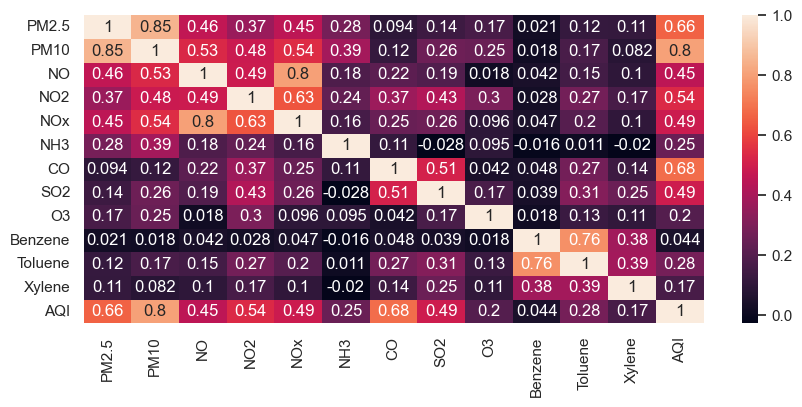

In [175]:
plt.figure(figsize = (10,4))
sns.heatmap(cor,annot = True)
plt.show()

In [176]:
df[['Xylene','AQI']].corr()

,Xylene,AQI
Xylene,1.000000,-0.028114
AQI,-0.028114,1.000000


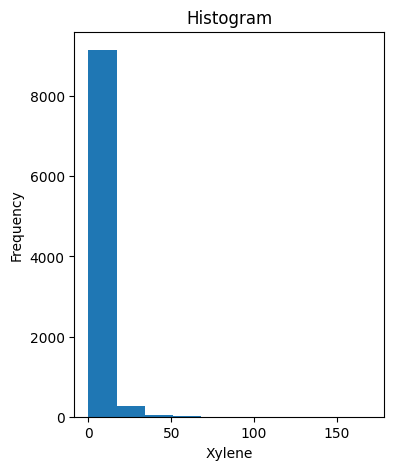

In [16]:
## univariate analysis
plt.figure(figsize=(4,5))
plt.title("Histogram")
plt.xlabel("Xylene")
plt.ylabel("Frequency")
plt.hist(df['Xylene'])
plt.show()

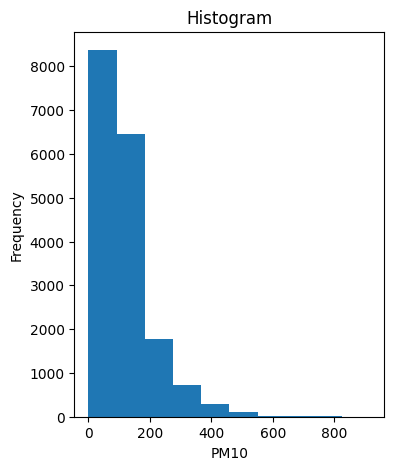

In [17]:
plt.figure(figsize=(4,5))
plt.title("Histogram")
plt.xlabel("PM10")
plt.ylabel("Frequency")
plt.hist(df['PM10'])
plt.show()

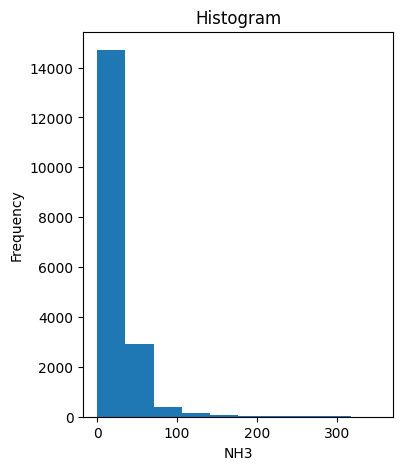

In [18]:
plt.figure(figsize=(4,5))
plt.title("Histogram")
plt.xlabel("NH3")
plt.ylabel("Frequency")
plt.hist(df['NH3'])
plt.show()

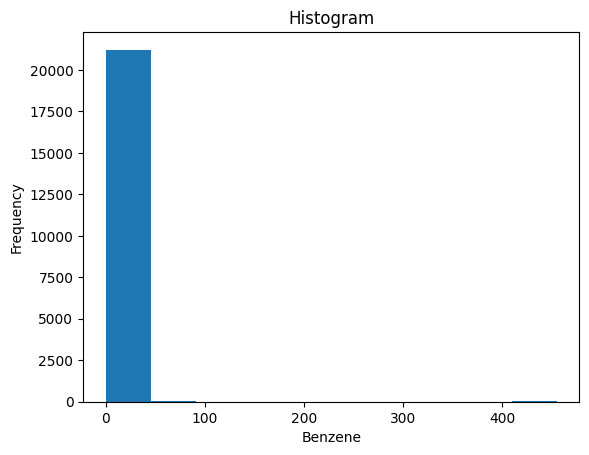

In [19]:

plt.title("Histogram")
plt.xlabel("Benzene")
plt.ylabel("Frequency")
plt.hist(df['Benzene'])
plt.show()

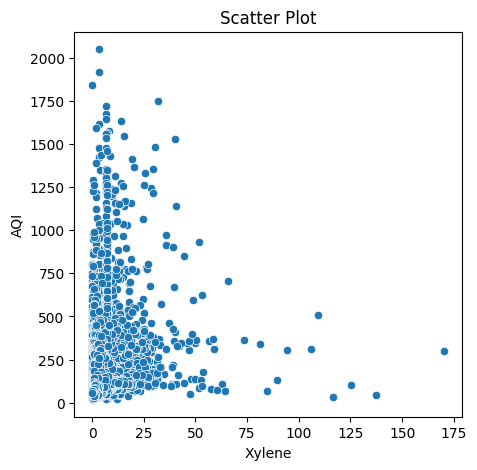

In [20]:
plt.figure(figsize=(5,5))
plt.title("Scatter Plot")
plt.xlabel("Xylene")
plt.ylabel("AQI")
sns.scatterplot(x="Xylene",y='AQI',data=df)
plt.show()

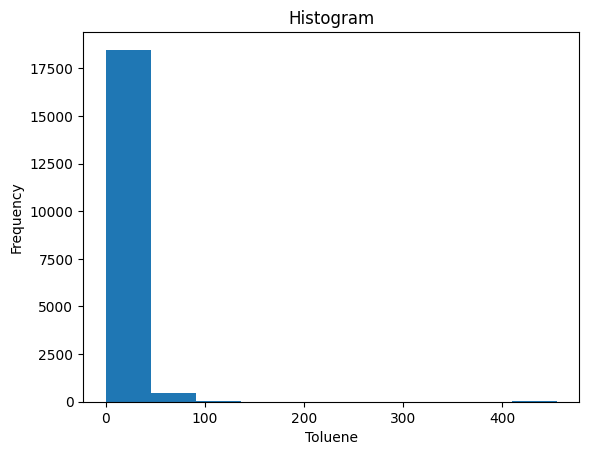

In [21]:

plt.title("Histogram")
plt.xlabel("Toluene")
plt.ylabel("Frequency")
plt.hist(df['Toluene'])
plt.show()

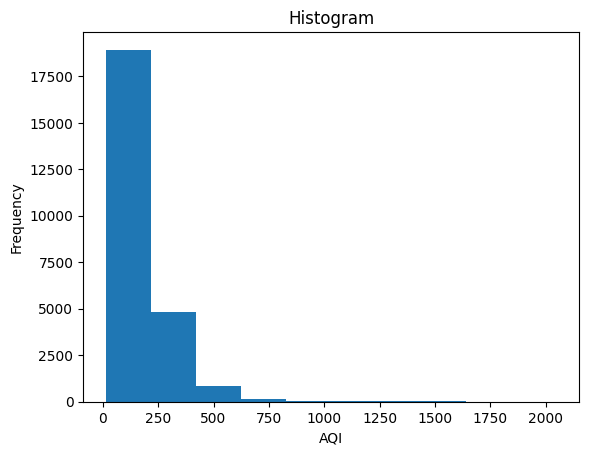

In [22]:

plt.title("Histogram")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.hist(df['AQI'])
plt.show()

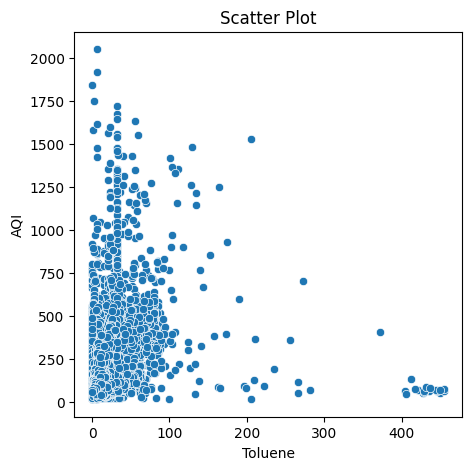

In [23]:
plt.figure(figsize=(5,5))
plt.title("Scatter Plot")
plt.xlabel("Toluene")
plt.ylabel("AQI")
sns.scatterplot(x="Toluene",y='AQI',data=df)
plt.show()

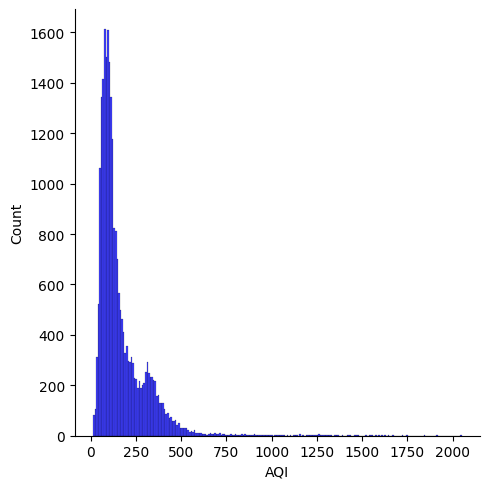

In [24]:
sns.displot(data=df,x='AQI',color="blue")
plt.show()

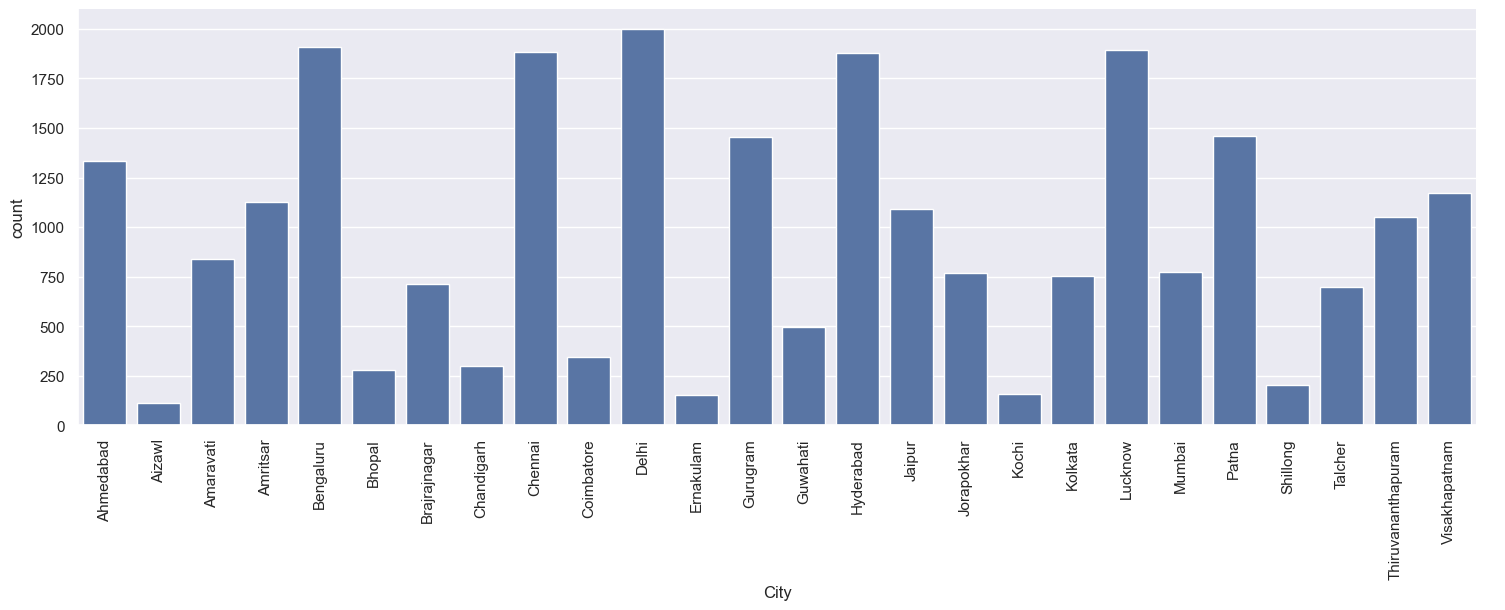

In [25]:
sns.set_theme(style="darkgrid")
graph = sns.catplot(x='City', kind= 'count', data=df, height = 5, aspect=3)
graph.set_xticklabels(rotation = 90)

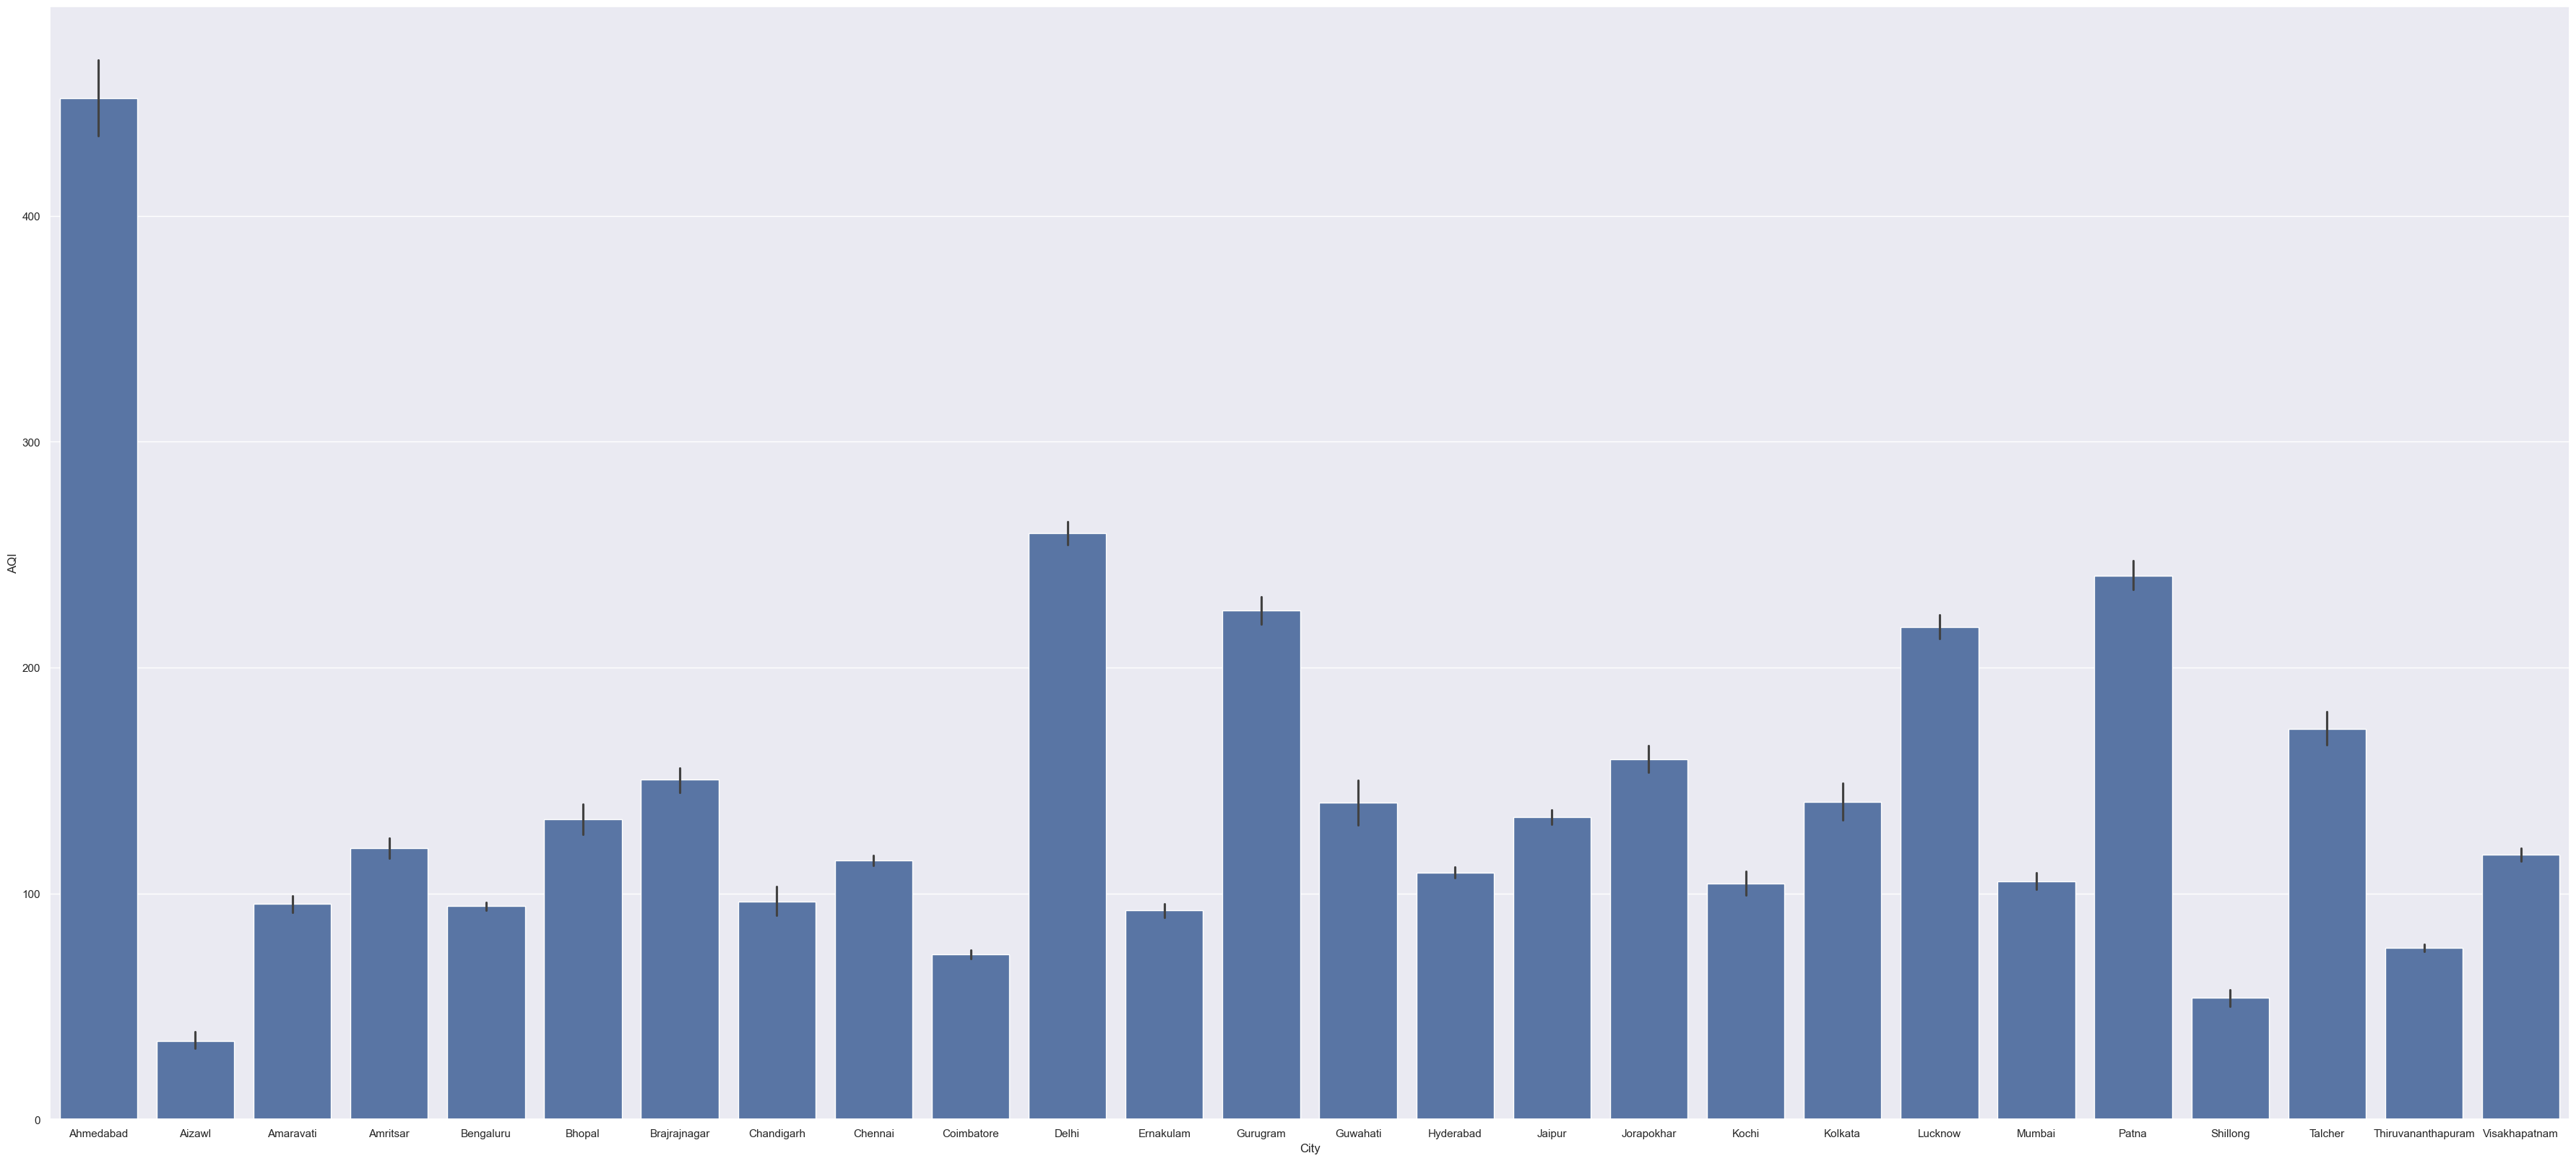

In [26]:
plt.figure(figsize=(45,20))
sns.barplot(x = "City",y = "AQI",data = df)
plt.show()

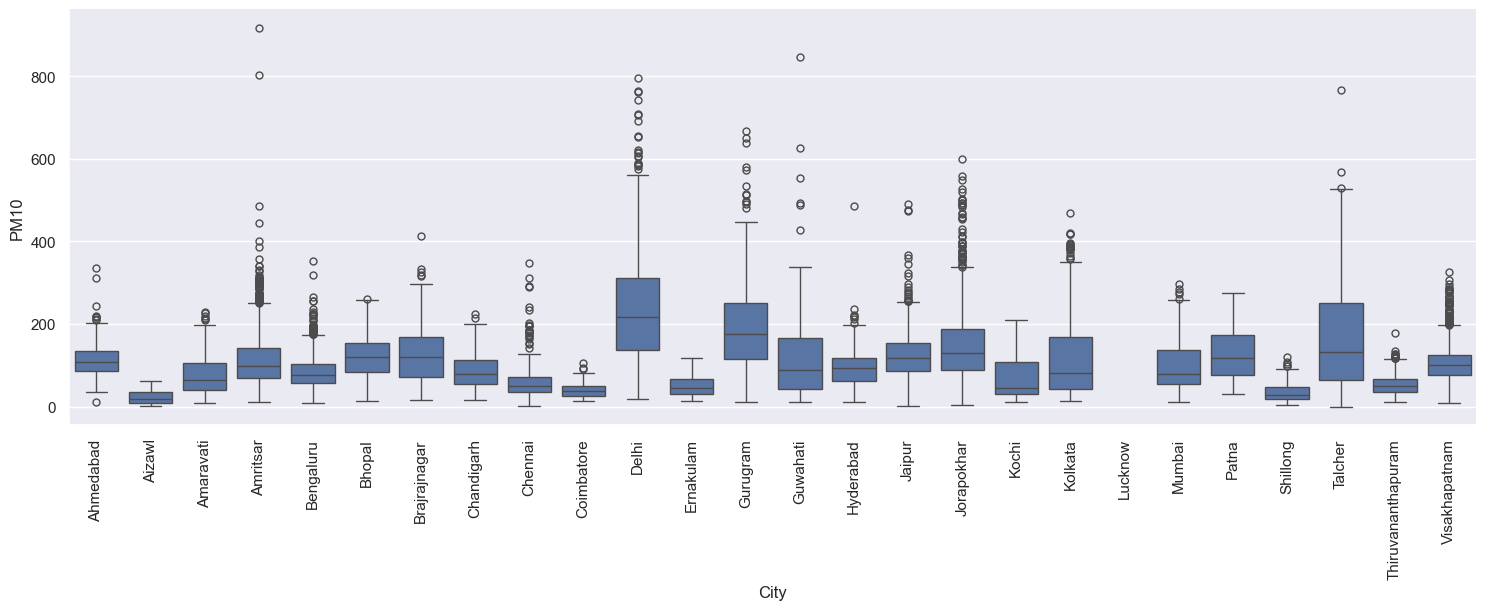

In [27]:
g = sns.catplot(x='City',y = "PM10", kind='box', data = df, height = 5, aspect = 3)
g.set_xticklabels(rotation = 90)


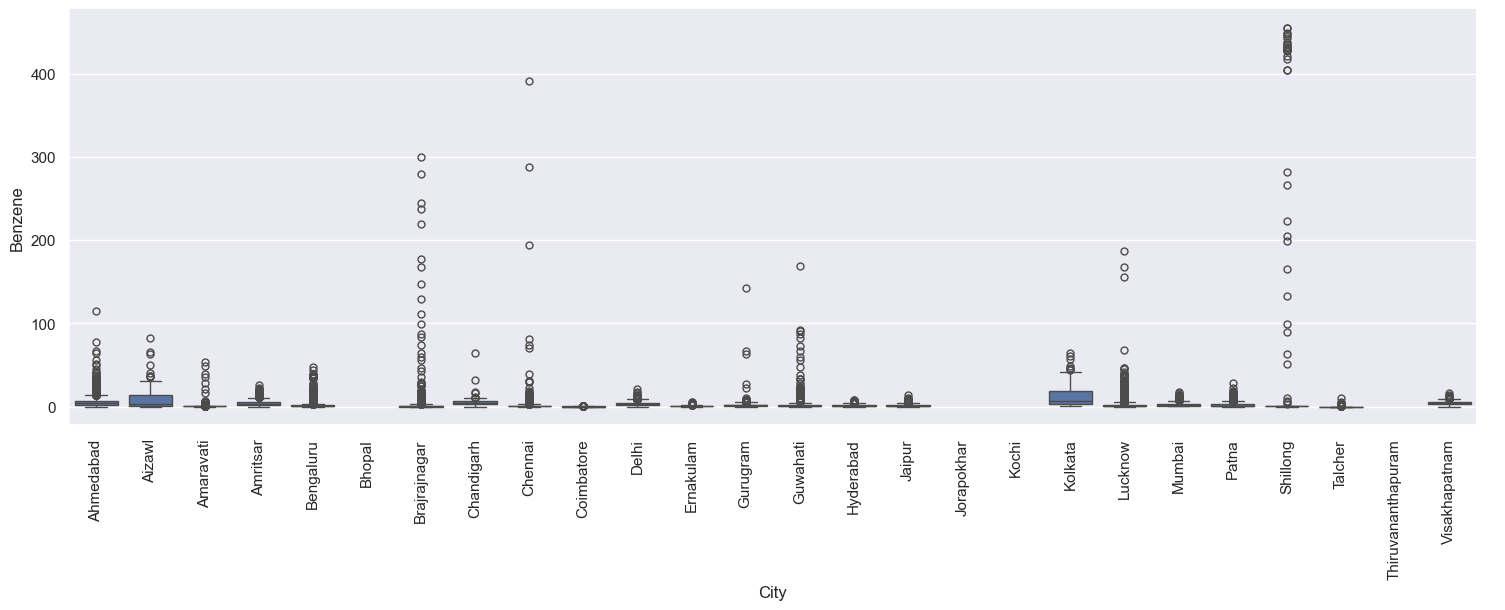

In [28]:
g1 = sns.catplot(x='City',y = "Benzene", kind='box', data = df, height = 5, aspect = 3)
g1.set_xticklabels(rotation = 90)

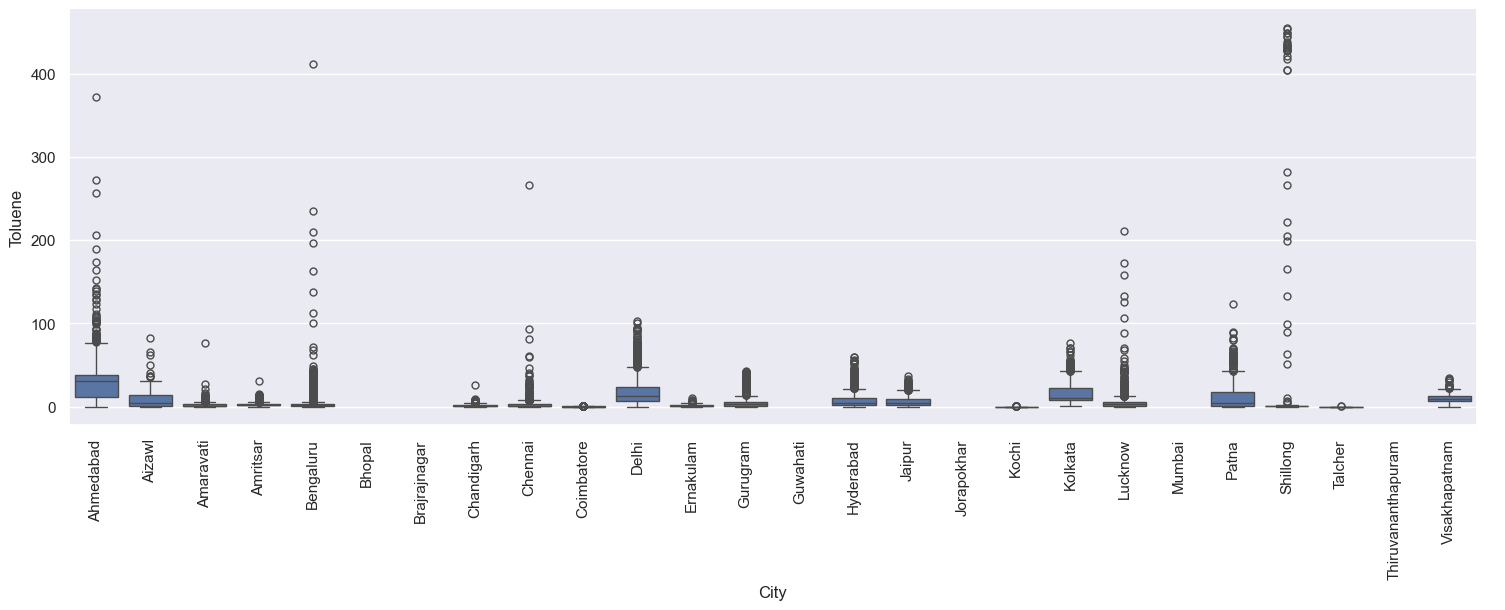

In [29]:
g2 = sns.catplot(x='City',y = "Toluene", kind='box', data = df, height = 5, aspect = 3)
g2.set_xticklabels(rotation = 90)

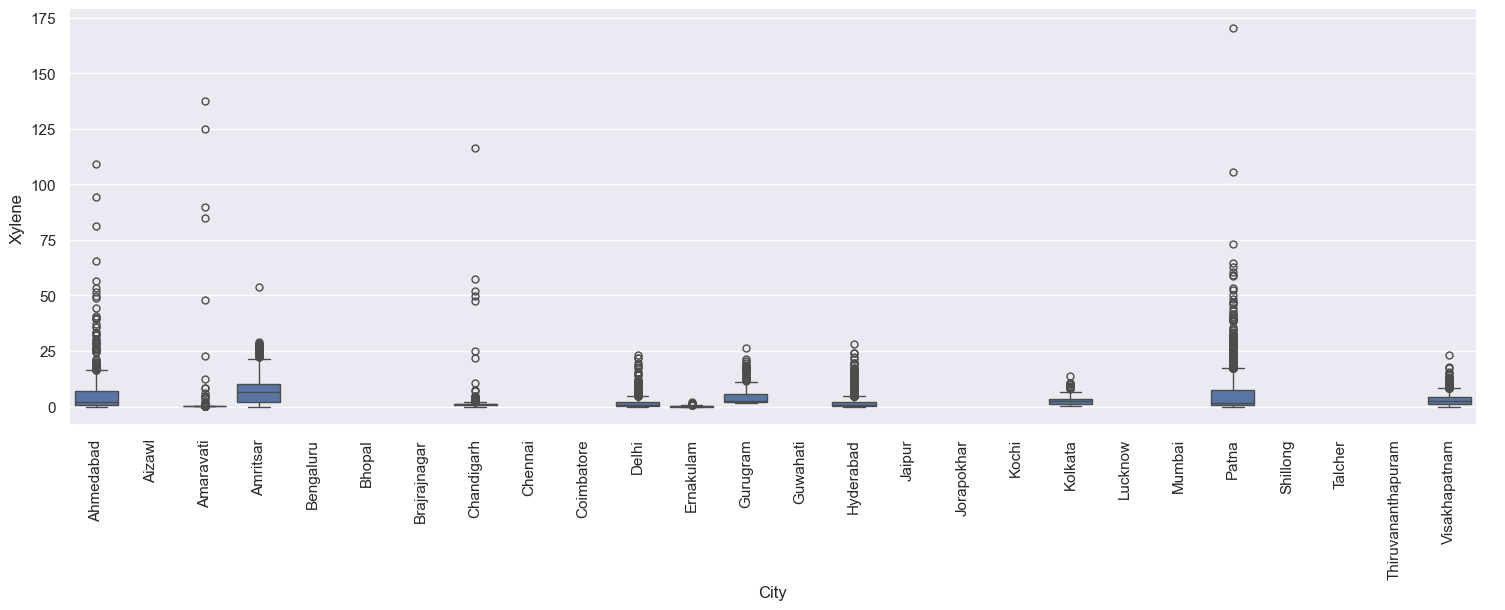

In [30]:
g3 = sns.catplot(x='City',y = "Xylene", kind='box', data = df, height = 5, aspect = 3)
g3.set_xticklabels(rotation = 90)

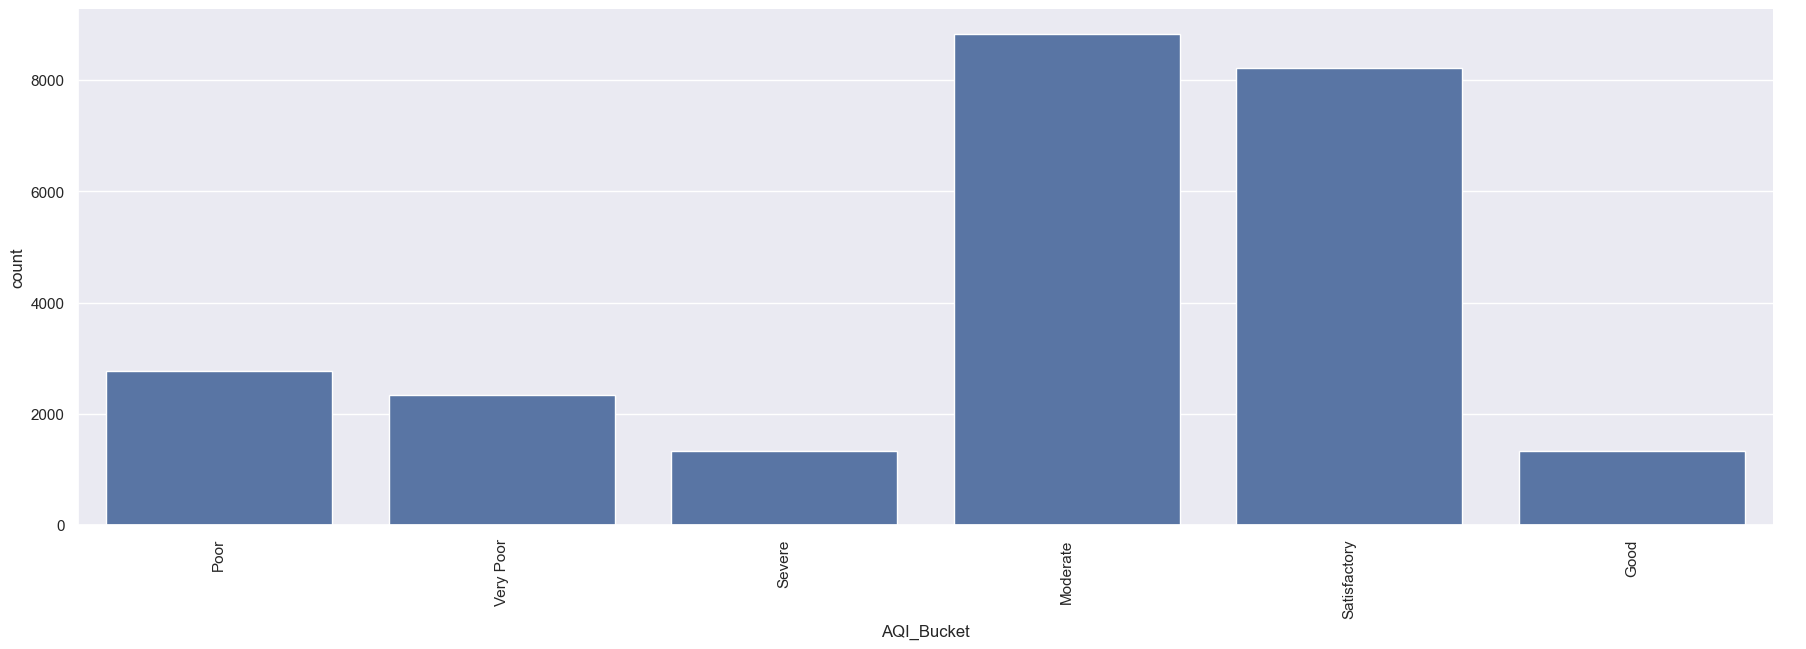

In [31]:
g = sns.catplot(x='AQI_Bucket', kind='count', data = df, height = 6, aspect = 3)
g.set_xticklabels(rotation = 90)

In [32]:
# to check null values
df.isnull().sum().sort_values(ascending = False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [33]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [34]:
df = df.replace({
    "PM2.5" : {np.nan:67.476613},
    "PM10" : {np.nan:118.454435},
    "NO" : {np.nan:17.622421},
    "NO2" : {np.nan:28.978391},
    "NOx" : {np.nan:32.289012},
    "NH3" : {np.nan:23.848366},
    "CO" : {np.nan:2.345267},
    "SO2" : {np.nan: 14.362933},
    "O3" : {np.nan:34.912885},
    "Benzene" : {np.nan:3.458668},
    "Toluene" : {np.nan:9.525714},
    "Xylene" : {np.nan:3.588683}
})



In [35]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [36]:
df.shape

(24850, 16)

In [37]:
df = df.drop(columns = "AQI_Bucket",axis = 1)

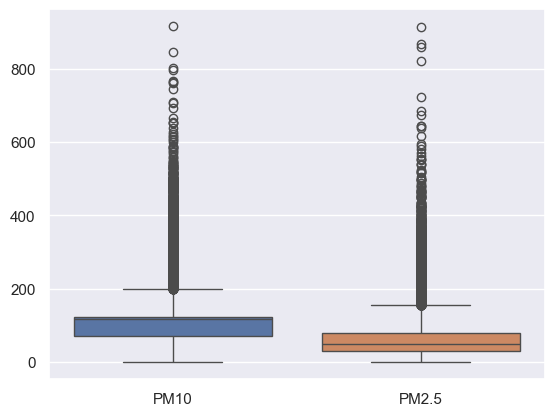

In [38]:
sns.boxplot(data = df[['PM10','PM2.5']])
plt.show()

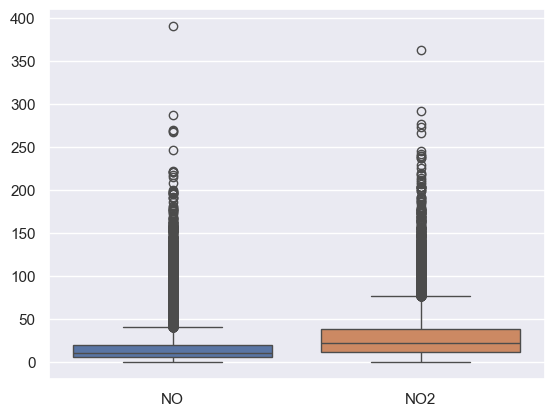

In [39]:
sns.boxplot(data = df[['NO','NO2']])
plt.show()

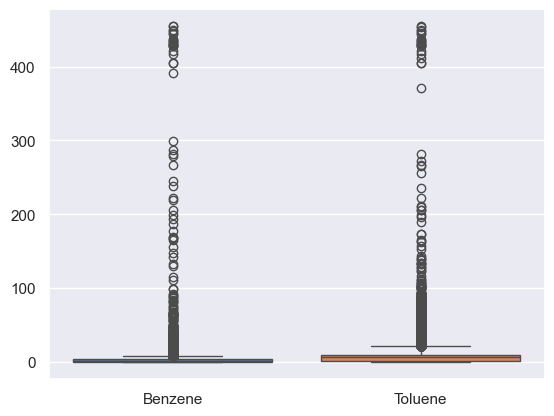

In [40]:
sns.boxplot(data = df[['Benzene','Toluene']])
plt.show()

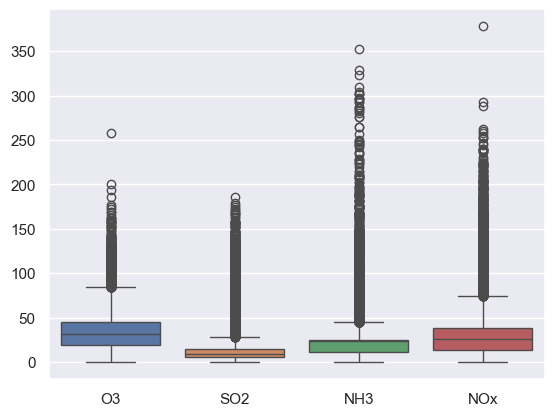

In [41]:
sns.boxplot(data = df[['O3','SO2','NH3','NOx']])
plt.show()

In [42]:
def replace_ouliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df[column] = df[column].apply(
            lambda x : Q1 if x < lower else (Q3 if x > upper else x)
        )
    return df

In [43]:
df = replace_ouliers(df)

In [44]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,55.174281,101.351323,12.507694,25.901114,26.574513,19.486584,1.040507,10.334743,33.177781,2.098520,6.222709,3.304507,146.932032
std,31.829575,39.079916,8.762015,16.669494,16.138682,9.630370,0.615436,5.680901,17.487724,1.828135,4.696068,0.558607,87.421731
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,1.250000,13.000000
25%,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.580000,2.650000,81.000000
50%,50.165000,118.454435,10.075000,22.535000,25.720000,23.848366,0.950000,9.430000,32.060000,1.810000,6.790000,3.588683,118.000000
75%,79.505625,122.955625,19.710000,37.910000,38.170000,24.710000,1.530000,14.890000,45.395625,3.458668,9.525714,3.588683,208.000000
max,154.300000,199.700000,40.680000,76.620000,74.380000,44.850000,2.940000,28.520000,83.990000,8.130000,21.440000,4.990000,398.000000


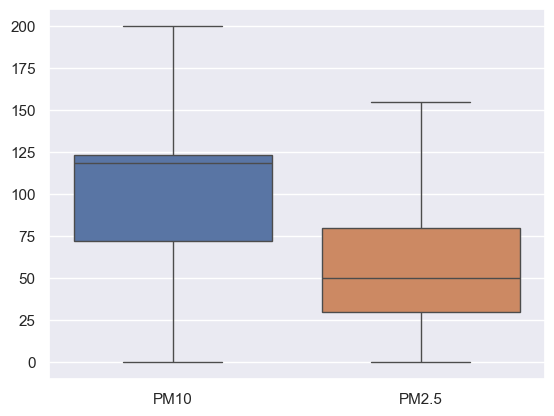

In [45]:
sns.boxplot(data = df[['PM10','PM2.5']])
plt.show()

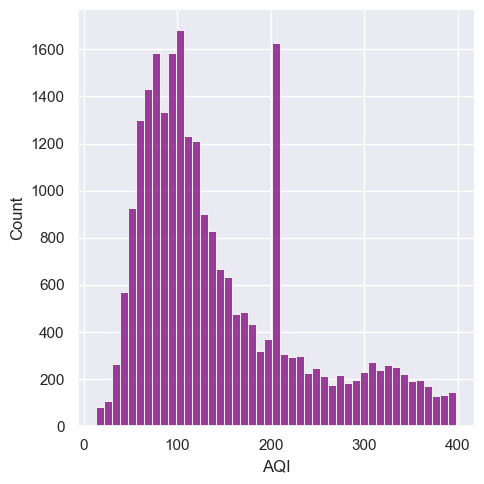

In [46]:
sns.displot(data = df,x = 'AQI',color='purple')
plt.show()

In [47]:
df1 = df.drop(columns = ['City'])


In [48]:
df1 = df1.drop(columns = ['Date'])


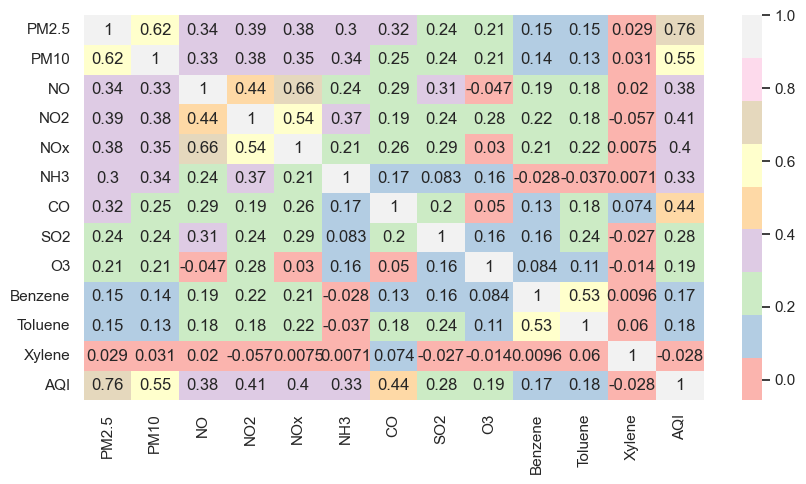

In [190]:
# Multi variate analysis
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot = True, cmap="Pastel1")
plt.show()

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    24850 non-null  float64
 1   PM10     24850 non-null  float64
 2   NO       24850 non-null  float64
 3   NO2      24850 non-null  float64
 4   NOx      24850 non-null  float64
 5   NH3      24850 non-null  float64
 6   CO       24850 non-null  float64
 7   SO2      24850 non-null  float64
 8   O3       24850 non-null  float64
 9   Benzene  24850 non-null  float64
 10  Toluene  24850 non-null  float64
 11  Xylene   24850 non-null  float64
 12  AQI      24850 non-null  float64
dtypes: float64(13)
memory usage: 2.7 MB


In [51]:
# data modeling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
#data = StandardScaler().fit_transform(df1)

In [54]:
df1.dtypes

PM2.5      float64
PM10       float64
NO         float64
NO2        float64
NOx        float64
NH3        float64
CO         float64
SO2        float64
O3         float64
Benzene    float64
Toluene    float64
Xylene     float64
AQI        float64
dtype: object

In [55]:
# Scaling of data
df1_array = np.array(df1)  
scaler = StandardScaler()
data = scaler.fit_transform(df1_array)

In [56]:
data

array([[ 0.87831149,  0.43765334, -0.63658947, ..., -1.32511601,
        -0.29450027,  0.70999757],
       [ 0.77494642,  0.43765334,  0.15319907, ..., -1.32511601,
         2.69513707,  2.07124258],
       [ 1.23616198,  0.43765334,  1.35614288, ..., -1.32298652,
         0.50873294,  0.69855854],
       ...,
       [-1.01367767, -0.91151782, -1.03376636, ..., -1.32298652,
        -1.17169925, -0.90290618],
       [-1.21066824, -1.31480214, -0.96528759, ..., -1.32511601,
        -1.17169925, -1.06305265],
       [-1.26219369, -0.90460877, -1.3818668 , ...,  0.70336955,
         0.50873294, -1.10880878]], shape=(24850, 13))

In [57]:
df = pd.DataFrame(data,columns=df1.columns)

In [58]:
df.head(5)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.325116,-0.294500,0.709998
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.325116,2.695137,2.071243
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.322987,0.508733,0.698559
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.316598,0.508733,0.698559
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-1.312339,0.508733,0.698559


In [59]:
# Split data into train and test dataset
from sklearn.model_selection import train_test_split

In [60]:
input_data = df.iloc[:,:-1]
output_data = df['AQI']

In [61]:
input_data.head(5)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.325116,-0.294500
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.325116,2.695137
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.322987,0.508733
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.316598,0.508733
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-1.312339,0.508733


In [62]:
output_data.head(5)

0    0.709998
1    2.071243
2    0.698559
3    0.698559
4    0.698559
Name: AQI, dtype: float64

In [63]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.20,random_state=42)

In [64]:
x_train.shape, x_test.shape

((19880, 12), (4970, 12))

In [65]:
y_train.shape, y_test.shape

((19880,), (4970,))

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [67]:
# Using Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [155]:
y_train_predict_lr = lr.predict(x_train)
y_test_predict_lr = lr.predict(x_test)

In [156]:
print("For Train Data")
print("Mean absolute error : ",mean_absolute_error(y_train,y_train_predict_lr))
print("Mean squared error : ",mean_squared_error(y_train,y_train_predict_lr))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_train,y_train_predict_lr)))
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_train,y_train_predict_lr))
print("R2 score : ",r2_score(y_train,y_train_predict_lr))
print("-"*60)
print("For Test Data")
print("Mean absolute error : ",mean_absolute_error(y_test,y_test_predict_lr))
print("Mean squared error : ",mean_squared_error(y_test,y_test_predict_lr))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_test_predict_lr)))
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_test,y_test_predict_lr))
print("R2 score : ",r2_score(y_test,y_test_predict_lr))

For Train Data
Mean absolute error :  0.4066661122128921
Mean squared error :  0.3501796567071222
Root mean squared error :  0.5917597964606266
Mean absolute percentage error :  2.574547004376552
R2 score :  0.6510774205877974
------------------------------------------------------------
For Test Data
Mean absolute error :  0.4025511735669842
Mean squared error :  0.33875821641527454
Root mean squared error :  0.5820293948034536
Mean absolute percentage error :  2.516134932113899
R2 score :  0.6562598886507953


In [78]:
# Using K-nearest neighbors 
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [157]:
y_train_predict_knn = knn.predict(x_train)
y_test_predict_knn = knn.predict(x_test)

In [158]:
print("For Train Data")
print("Mean absolute error : ",mean_absolute_error(y_train,y_train_predict_knn))
print("Mean squared error : ",mean_squared_error(y_train,y_train_predict_knn))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_train,y_train_predict_knn)))
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_train,y_train_predict_knn))
print("R2 score : ",r2_score(y_train,y_train_predict_knn))
print("-"*60)
print("For Test Data")
print("Mean absolute error : ",mean_absolute_error(y_test,y_test_predict_knn))
print("Mean squared error : ",mean_squared_error(y_test,y_test_predict_knn))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_test_predict_knn)))
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_test,y_test_predict_knn))
print("R2 score : ",r2_score(y_test,y_test_predict_knn))

For Train Data
Mean absolute error :  0.24117280674709338
Mean squared error :  0.15203024156076853
Root mean squared error :  0.3899105558468102
Mean absolute percentage error :  1.678467181156053
R2 score :  0.8485155176263993
------------------------------------------------------------
For Test Data
Mean absolute error :  0.2990678967292287
Mean squared error :  0.2306433518339109
Root mean squared error :  0.4802534245936315
Mean absolute percentage error :  2.50915946438626
R2 score :  0.7659647276447062


In [86]:
# Using Support Vector Machine
sv = SVR(kernel = 'rbf')
sv.fit(x_train,y_train)

SVR()

In [159]:
y_train_predict_sv = sv.predict(x_train)
y_test_predict_sv = sv.predict(x_test)

In [168]:
print("For Train Data")
print("Mean absolute error : ",mean_absolute_error(y_train,y_train_predict_sv))
print("Mean squared error : ",mean_squared_error(y_train,y_train_predict_sv))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_train,y_train_predict_sv)))
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_train,y_train_predict_sv))
print("R2 score : ",r2_score(y_train,y_train_predict_sv))
print("-"*60)
print("For Test Data")
print("Mean absolute error : ",mean_absolute_error(y_test,y_test_predict_sv))
print("Mean squared error : ",mean_squared_error(y_test,y_test_predict_sv))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_test_predict_sv)))
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_test,y_test_predict_sv))
print("R2 score : ",r2_score(y_test,y_test_predict_sv))

For Train Data
Mean absolute error :  0.2795599693113559
Mean squared error :  0.23427602402646697
Root mean squared error :  0.4840206855357186
Mean absolute percentage error :  1.6833532426888884
R2 score :  0.7665649816256519
------------------------------------------------------------
For Test Data
Mean absolute error :  0.29911221038332925
Mean squared error :  0.24710695342847283
Root mean squared error :  0.4970985349289141
Mean absolute percentage error :  2.0818231493067163
R2 score :  0.7492590066581895


In [118]:
# Using Decision Tree
d = DecisionTreeRegressor(max_depth = 10)
d.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [162]:
y_train_predict_d = d.predict(x_train)
y_test_predict_d = d.predict(x_test)

In [163]:
print("For Train Data")
print("Mean absolute error : ",mean_absolute_error(y_train,y_train_predict_d))
print("Mean squared error : ",mean_squared_error(y_train,y_train_predict_d))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_train,y_train_predict_d)))
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_train,y_train_predict_d))
print("R2 score : ",r2_score(y_train,y_train_predict_d))
print("-"*60)
print("For Test Data")
print("Mean absolute error : ",mean_absolute_error(y_test,y_test_predict_d))
print("Mean squared error : ",mean_squared_error(y_test,y_test_predict_d))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_test_predict_d)))
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_test,y_test_predict_d))
print("R2 score : ",r2_score(y_test,y_test_predict_d))

For Train Data
Mean absolute error :  0.2276145526577883
Mean squared error :  0.12571336988279258
Root mean squared error :  0.35456081267223055
Mean absolute percentage error :  1.4763787096373295
R2 score :  0.8747379168208198
------------------------------------------------------------
For Test Data
Mean absolute error :  0.2837901437422598
Mean squared error :  0.2029217848992492
Root mean squared error :  0.4504684061055217
Mean absolute percentage error :  1.9077443297701502
R2 score :  0.7940939774846973


In [144]:
# Using Random Forest 
rf = RandomForestRegressor(n_estimators=2000)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=2000)

In [166]:
y_train_predict_rf = rf.predict(x_train)
y_test_predict_rf = rf.predict(x_test)

In [167]:
print("For Train Data")
print("Mean absolute error : ",mean_absolute_error(y_train,y_train_predict_rf))
print("Mean squared error : ",mean_squared_error(y_train,y_train_predict_rf))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_train,y_train_predict_rf)))
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_train,y_train_predict_rf))
print("R2 score : ",r2_score(y_train,y_train_predict_rf))
print("-"*60)
print("For Test Data")
print("Mean absolute error : ",mean_absolute_error(y_test,y_test_predict_rf))
print("Mean squared error : ",mean_squared_error(y_test,y_test_predict_rf))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_test_predict_rf)))
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_test,y_test_predict_rf))
print("R2 score : ",r2_score(y_test,y_test_predict_rf))

For Train Data
Mean absolute error :  0.09116170087096226
Mean squared error :  0.02136110167277439
Root mean squared error :  0.14615437616703233
Mean absolute percentage error :  0.6071360492770638
R2 score :  0.9787155805541711
------------------------------------------------------------
For Test Data
Mean absolute error :  0.2441876865832219
Mean squared error :  0.15158639327587697
Root mean squared error :  0.38934097302477294
Mean absolute percentage error :  1.6943762069115051
R2 score :  0.8461843250473413


In [187]:
# using voting Model
from sklearn.ensemble import VotingRegressor
li = [("lr",LinearRegression()),("dt",DecisionTreeRegressor()),("sv",SVR()),("rf",RandomForestRegressor()),("knn",KNeighborsRegressor())]
vr = VotingRegressor(li)
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()), ('sv', SVR()),
                            ('rf', RandomForestRegressor()),
                            ('knn', KNeighborsRegressor())])

In [188]:
y_train_predict_vr = vr.predict(x_train)
y_test_predict_vr = vr.predict(x_test)

In [189]:
print("For Train Data")
print("Mean absolute error : ",mean_absolute_error(y_train,y_train_predict_vr))
print("Mean squared error : ",mean_squared_error(y_train,y_train_predict_vr))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_train,y_train_predict_vr)))
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_train,y_train_predict_vr))
print("R2 score : ",r2_score(y_train,y_train_predict_vr))
print("-"*60)
print("For Test Data")
print("Mean absolute error : ",mean_absolute_error(y_test,y_test_predict_vr))
print("Mean squared error : ",mean_squared_error(y_test,y_test_predict_vr))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_test_predict_vr)))
print("Mean absolute percentage error : ",mean_absolute_percentage_error(y_test,y_test_predict_vr))
print("R2 score : ",r2_score(y_test,y_test_predict_vr))

For Train Data
Mean absolute error :  0.18468738477128174
Mean squared error :  0.0849387204714144
Root mean squared error :  0.2914424822695113
Mean absolute percentage error :  1.1611386463727607
R2 score :  0.9153661931205634
------------------------------------------------------------
For Test Data
Mean absolute error :  0.27295235743380136
Mean squared error :  0.17936815415947413
Root mean squared error :  0.4235187766315375
Mean absolute percentage error :  1.7087884405981426
R2 score :  0.8179939960254824
